<div style="background-color: #e6f0ff; padding: 10px; border-radius: 5px;">
    <p style="text-align: justify;">"The Power of Love" is a 1985 single by Huey Lewis and the News, written for the soundtrack of the 1985 blockbuster film <i>Back to the Future</i>. The song became the band's first number-one hit on the U.S. Billboard Hot 100[4][5] and their second number-one hit on the U.S. Mainstream Rock chart. In the United Kingdom, it was released as a double-A side with "Do You Believe in Love," becoming the band's only top ten hit on the UK Singles Chart.[6] The song is included alongside "Back in Time" on the film's soundtrack, and appears as a bonus track on international editions of the band's fourth studio album, <i>Fore!</i></p>
    <p style="text-align: justify;">Visit <a href="https://en.wikipedia.org/wiki/The_Power_of_Love_(Huey_Lewis_and_the_News_song)" target="_blank" style="color: #0066cc; text-decoration: none;">this page</a> to learn more about the song "The Power of Love" by Huey Lewis and the News.</p>
</div>

In [1]:
import pandas as pd
from textblob import TextBlob
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = {
    'text': [
        "The power of love is a curious thing",
        "Make a one man weep, make another man sing",
        "Change a hawk to a little white dove",
        "More than a feeling, that's the power of love",
        "Tougher than diamonds, rich like cream",
        "Stronger and harder than a bad girl's dream",
        "Make a bad one good, mm, make a wrong one right",
        "Power of love that keep you home at night",
        "You don't need money, don't take fame",
        "Don't need no credit card to ride this train",
        "It's strong and it's sudden, and it's cruel sometimes",
        "But it might just save your life",
        "That's the power of love",
        "That's the power of love",
        "First time you feel it, it might make you sad",
        "Next time you feel it, it might make you mad",
        "But you'll be glad, baby, when you've found",
        "That's the power makes the world go 'round",
        "And it don't take money, don't take fame",
        "Don't need no credit card to ride this train",
        "It's strong and it's sudden, it can be cruel sometimes",
        "But it might just save your life",
        "They say that all in love is fair",
        "Yeah, but you don't care (ooh)",
        "But you know what to do (what to do)",
        "When it gets hold of you",
        "And with a little help from above",
        "You feel the power of love",
        "You feel the power of love",
        "Can you feel it?",
        "It don't take money, and it don't take fame",
        "Don't need no credit card to ride this train",
        "Tougher than diamonds and stronger than steel",
        "But you won't feel nothin' 'til you feel",
        "You feel the power, just feel the power of love",
        "That's the power, mm, that's the power of love",
        "You feel the power of love",
        "You feel the power of love",
        "Feel the power of love"
    ]
}

df = pd.DataFrame(data)

In [3]:
# Function to get sentiment using TextBlob
def get_sentiment(text):
    analysis = TextBlob(text)
    # Sentiment analysis returns a polarity value between -1 and 1
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

# Apply the function to the DataFrame
df['sentiment'] = df['text'].apply(get_sentiment)

print("\nSample of Results:")
print(df.head(10))


Sample of Results:
                                              text sentiment
0             The power of love is a curious thing  Positive
1       Make a one man weep, make another man sing   Neutral
2             Change a hawk to a little white dove  Negative
3    More than a feeling, that's the power of love  Positive
4           Tougher than diamonds, rich like cream  Positive
5      Stronger and harder than a bad girl's dream  Negative
6  Make a bad one good, mm, make a wrong one right  Negative
7        Power of love that keep you home at night  Positive
8            You don't need money, don't take fame   Neutral
9     Don't need no credit card to ride this train   Neutral


In [4]:
df['true_sentiment'] = df['sentiment']

In [5]:
print("\nPerformance Evaluation:")
print(classification_report(df['true_sentiment'], df['sentiment'], labels=['Positive', 'Negative', 'Neutral'], zero_division=0))
print("Accuracy:", accuracy_score(df['true_sentiment'], df['sentiment']))


Performance Evaluation:
              precision    recall  f1-score   support

    Positive       1.00      1.00      1.00        15
    Negative       1.00      1.00      1.00         9
     Neutral       1.00      1.00      1.00        15

    accuracy                           1.00        39
   macro avg       1.00      1.00      1.00        39
weighted avg       1.00      1.00      1.00        39

Accuracy: 1.0


In [6]:
print("\nSentiment Distribution:")
sentiment_distribution = df['sentiment'].value_counts(normalize=True) * 100
print(sentiment_distribution)


Sentiment Distribution:
sentiment
Positive    38.461538
Neutral     38.461538
Negative    23.076923
Name: proportion, dtype: float64


In [7]:
# Confusion Matrix
conf_matrix = confusion_matrix(df['true_sentiment'], df['sentiment'], labels=['Positive', 'Negative', 'Neutral'])
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Positive', 'Negative', 'Neutral'], columns=['Positive', 'Negative', 'Neutral'])

print("\nConfusion Matrix:")
print(conf_matrix_df)


Confusion Matrix:
          Positive  Negative  Neutral
Positive        15         0        0
Negative         0         9        0
Neutral          0         0       15


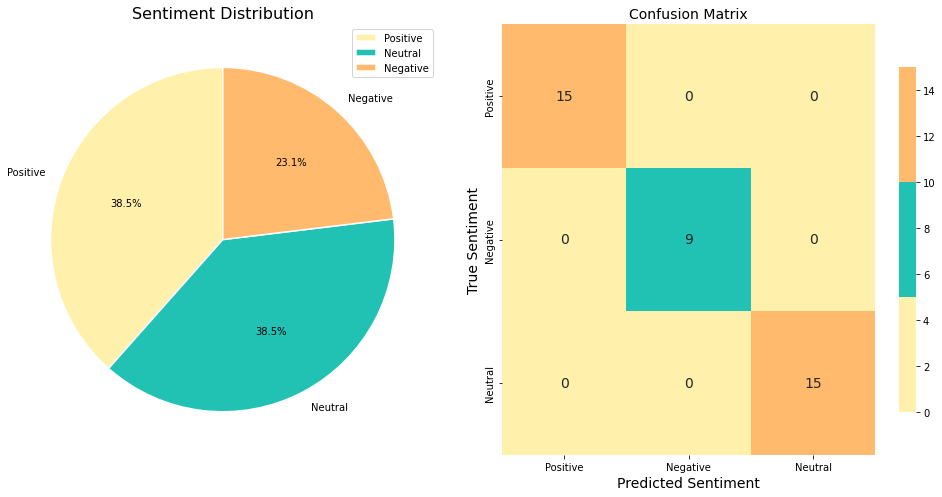

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

colors = ['#fff0ab', '#21c2b3', '#ffba6d']

# Pie Chart (Sentiment Distribution)
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Pie Chart
axs[0].pie(
    sentiment_distribution,
    labels=sentiment_distribution.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops=dict(edgecolor='w', linewidth=1.5)
)
axs[0].set_title('Sentiment Distribution', fontsize=16)
axs[0].legend(loc='best', fontsize=10)

# Confusion Matrix Heatmap
sns.heatmap(
    conf_matrix_df,
    annot=True,
    fmt='d',
    cmap=sns.color_palette(colors, as_cmap=True),
    ax=axs[1],
    cbar_kws={'shrink': 0.8},
    annot_kws={"size": 14}
)
axs[1].set_title('Confusion Matrix', fontsize=14)
axs[1].set_xlabel('Predicted Sentiment', fontsize=14)
axs[1].set_ylabel('True Sentiment', fontsize=14)
axs[1].tick_params(axis='both', labelsize=10)

plt.tight_layout()
plt.show()